<h1>APP评分预测实验<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1、实验背景" data-toc-modified-id="1、实验背景-1">1、实验背景</a></span></li><li><span><a href="#2、实验目的" data-toc-modified-id="2、实验目的-2">2、实验目的</a></span></li><li><span><a href="#3、实验总体设计" data-toc-modified-id="3、实验总体设计-3">3、实验总体设计</a></span></li><li><span><a href="#4、实验详细实现流程" data-toc-modified-id="4、实验详细实现流程-4">4、实验详细实现流程</a></span><ul class="toc-item"><li><span><a href="#4.1-导入实验环境" data-toc-modified-id="4.1-导入实验环境-4.1">4.1 导入实验环境</a></span></li><li><span><a href="#4.2-数据准备" data-toc-modified-id="4.2-数据准备-4.2">4.2 数据准备</a></span><ul class="toc-item"><li><span><a href="#4.2.1-数据获取" data-toc-modified-id="4.2.1-数据获取-4.2.1">4.2.1 数据获取</a></span></li><li><span><a href="#4.2.2-特征工程" data-toc-modified-id="4.2.2-特征工程-4.2.2">4.2.2 特征工程</a></span><ul class="toc-item"><li><span><a href="#4.2.2.1-数据标准化" data-toc-modified-id="4.2.2.1-数据标准化-4.2.2.1">4.2.2.1 数据标准化</a></span></li></ul></li></ul></li><li><span><a href="#4.3-建模分析" data-toc-modified-id="4.3-建模分析-4.3">4.3 建模分析</a></span><ul class="toc-item"><li><span><a href="#4.3.1-回归算法" data-toc-modified-id="4.3.1-回归算法-4.3.1">4.3.1 回归算法</a></span><ul class="toc-item"><li><span><a href="#4.3.1.1-线性回归" data-toc-modified-id="4.3.1.1-线性回归-4.3.1.1">4.3.1.1 线性回归</a></span></li><li><span><a href="#4.3.1.2-SVR回归（支持向量回归）" data-toc-modified-id="4.3.1.2-SVR回归（支持向量回归）-4.3.1.2">4.3.1.2 SVR回归（支持向量回归）</a></span></li><li><span><a href="#4.3.1.3-K近邻回归" data-toc-modified-id="4.3.1.3-K近邻回归-4.3.1.3">4.3.1.3 K近邻回归</a></span></li><li><span><a href="#4.3.1.4-回归算法可视化对比" data-toc-modified-id="4.3.1.4-回归算法可视化对比-4.3.1.4">4.3.1.4 回归算法可视化对比</a></span></li></ul></li><li><span><a href="#4.3.2-分类算法" data-toc-modified-id="4.3.2-分类算法-4.3.2">4.3.2 分类算法</a></span><ul class="toc-item"><li><span><a href="#4.3.2.1-决策树参数" data-toc-modified-id="4.3.2.1-决策树参数-4.3.2.1">4.3.2.1 决策树参数</a></span></li></ul></li><li><span><a href="#4.3.3-模型调优" data-toc-modified-id="4.3.3-模型调优-4.3.3">4.3.3 模型调优</a></span><ul class="toc-item"><li><span><a href="#4.3.3.1-交叉验证" data-toc-modified-id="4.3.3.1-交叉验证-4.3.3.1">4.3.3.1 交叉验证</a></span></li><li><span><a href="#4.3.3.2-网格搜索" data-toc-modified-id="4.3.3.2-网格搜索-4.3.3.2">4.3.3.2 网格搜索</a></span></li><li><span><a href="#4.3.3.3-随机搜索" data-toc-modified-id="4.3.3.3-随机搜索-4.3.3.3">4.3.3.3 随机搜索</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#5、总结分析" data-toc-modified-id="5、总结分析-5">5、总结分析</a></span></li></ul></div>

# 1、实验背景
本实验是对本课程的监督学习算法(包括各项回归算法以及决策树分类算法）进行一个整体的回顾，我们使用的数据是APP评分数据集，目标是根据手机APP的各种特征（如大小、安装数量、历史版本等）来预测该APP的得分情况。

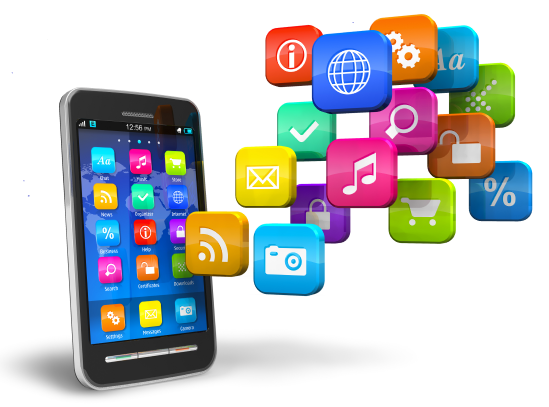

# 2、实验目的
* 对APP的评分进行预测
* 回顾监督学习的相关算法
* 了解在实际应用中如何选择算法

# 3、实验总体设计
首先我们导入数据，然后分别用线性回归、SVR、KNN回归算法，训练三个回归模型对APP进行预测。接下来我们会将评分数据离散化，用决策树模型训练分类模型进行预测。并使用MSE评价指标对模型效果进行评估，找到效果比较好的一个模型。

# 4、实验详细实现流程

## 4.1 导入实验环境

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#设置中文编码和负号的正常显示
plt.rcParams['font.family']='Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

#特征工程所需包
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#回归算法所需包
from sklearn.linear_model import LinearRegression#线性回归
from sklearn.neighbors import KNeighborsRegressor#K近邻
from sklearn.svm import SVR#支持向量回归算法
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,accuracy_score,r2_score#均方误差、精确率等评价指标

#分类算法
from sklearn.tree import DecisionTreeClassifier#决策树

#模型调优
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## 4.2 数据准备
本次实验使用的数据集都是之前处理好的，较为整齐，因此不需要进行数据预处理工作。我们将重点聚焦到各种回归和分类算法部分。


### 4.2.1 数据获取

In [17]:
#读取数据集
data = pd.read_csv("data/df_after_filter.csv",index_col=0)

In [18]:
data.tail()

,Size,Installs,Reviews,0,1,2,3,4,5,6,...,21,22,23,24,25,26,27,28,29,Rating
10235,38.0,53.000000,5000.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5
10236,4.0,3.600000,100.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
10237,3.0,9.500000,1000.0,0.0,1.0,26.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.3
10238,114.0,13.189321,1000.0,0.0,3.0,7.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5
10239,398307.0,19.000000,10000000.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5


每一行表示一个APP。这里数据一共有34个特征，其中最后一列rating为标签，表示这些APP的用户评分的大小，满分为5.0分，最低得分为0分。

剩下的指标表示APP的特征，比如APP的大小（size)、安装数量(installs)（单位：千次）、历史版本(reviews)等。从第四列开始的特征都是之前经过哑变量编码好的分类特征。因此整体的数据格式较为整齐，我们接下来进入特征工程环节。

### 4.2.2 特征工程
* 数据标准化
* 特征选择

In [19]:
#首先确定样本数据的标签
features = data.drop(["Rating"],axis='columns')
target = data["Rating"]

In [20]:
#查看特征值的整体信息
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10240 entries, 0 to 10239
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Size      10240 non-null  float64
 1   Installs  10240 non-null  float64
 2   Reviews   10240 non-null  float64
 3   0         10240 non-null  float64
 4   1         10240 non-null  float64
 5   2         10240 non-null  float64
 6   3         10240 non-null  float64
 7   4         10240 non-null  float64
 8   5         10240 non-null  float64
 9   6         10240 non-null  float64
 10  7         10240 non-null  float64
 11  8         10240 non-null  float64
 12  9         10240 non-null  float64
 13  10        10240 non-null  float64
 14  11        10240 non-null  float64
 15  12        10240 non-null  float64
 16  13        10240 non-null  float64
 17  14        10240 non-null  float64
 18  15        10240 non-null  float64
 19  16        10240 non-null  float64
 20  17        10240 non-null  fl

可以看到， 数据还是较为整齐的，没有缺失值

In [21]:
features.describe(percentiles=([.25,.50,.75,.99]))#显示25%，50%，75%，99%分位数

,Size,Installs,Reviews,0,1,2,3,4,5,6,...,20,21,22,23,24,25,26,27,28,29
count,1.024000e+04,10240.000000,1.024000e+04,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,...,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000
mean,2.150424e+05,20.798531,9.815612e+06,0.924862,1.452148,24.209570,0.006250,0.008301,0.022461,0.041602,...,0.025488,0.037793,0.031055,0.021777,0.026074,0.034082,0.081543,0.022754,0.016797,0.008008
std,8.257020e+05,20.868665,5.664646e+07,15.198982,0.998121,13.172933,0.078813,0.090734,0.148184,0.199687,...,0.157610,0.190705,0.173474,0.145963,0.159364,0.181449,0.273681,0.149125,0.128516,0.089132
min,0.000000e+00,0.008000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000e+01,5.600000,1.000000e+03,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.588500e+03,14.000000,1.000000e+05,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.273425e+04,27.930205,1.000000e+06,0.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
99%,5.150230e+06,95.000000,1.000000e+08,7.990000,4.000000,46.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,8.389714e+06,100.000000,1.000000e+09,400.000000,4.000000,47.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


各个指标的99%分位数与最大值的差距较小，但是”0“这一列差距较大，因此我们再使用箱线图观察一下

<AxesSubplot:xlabel='Size'>

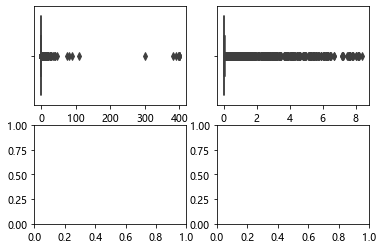

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
#导入数据可视化包matplotlib,seaborn
fig,axes=plt.subplots(2,2)
#画出箱线图
sns.boxplot(x='0',data=features,ax=axes[0,0])
sns.boxplot(x='Size',data=features,ax=axes[0,1])

可以看到，”0“这一列的异常值还是较多的，我们将该列删除。

In [23]:
features=features.drop(["0"],axis='columns')

#### 4.2.2.1 数据标准化

在本实验中，因为前三列数据的方差较大，而后面的数据上下波动较小，因此前三列数据的价值可能会被高估，因此，我们需要对数据进行一定的标准化。大多数机器学习算法中，会选择StandardScaler来进行特征缩放，因为MinMaxScaler对异常值较为敏感。

* 在PCA，聚类，逻辑回归，支持向量机，神经网络这些算法中，StandardScaler往往是最好的选择。

* MinMaxScaler在不涉及距离度量、梯度、协方差计算以及数据需要被压缩到特定区间时使用广泛，比如数字图像处理中量化像素强度时，都会使用MinMaxScaler将数据压缩于[0,1]区间之中。

因为这里我们选用StandardScaler。

In [24]:
sc=StandardScaler(copy=False)
features= pd.DataFrame(sc.fit_transform(features))
features.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.260256,-0.086188,-0.173110,-0.453022,-1.610166,12.60952,-0.091489,-0.151582,-0.208344,-0.076772,...,-0.161725,-0.198185,-0.179025,-0.149205,-0.163622,-0.187842,-0.297964,-0.15259,-0.130705,-0.089847
1,-0.259277,-0.325793,-0.164460,-0.453022,-1.610166,12.60952,-0.091489,-0.151582,-0.208344,-0.076772,...,-0.161725,-0.198185,-0.179025,-0.149205,-0.163622,-0.187842,-0.297964,-0.15259,-0.130705,-0.089847
2,-0.154461,-0.579775,-0.085016,-0.453022,-1.610166,12.60952,-0.091489,-0.151582,-0.208344,-0.076772,...,-0.161725,-0.198185,-0.179025,-0.149205,-0.163622,-0.187842,-0.297964,-0.15259,-0.130705,-0.089847
3,0.000729,0.201339,0.709424,2.552773,-1.610166,12.60952,-0.091489,-0.151582,-0.208344,-0.076772,...,-0.161725,-0.198185,-0.179025,-0.149205,-0.163622,-0.187842,-0.297964,-0.15259,-0.130705,-0.089847
4,-0.259277,-0.862509,-0.171522,-0.453022,-1.610166,12.60952,-0.091489,-0.151582,-0.208344,-0.076772,...,-0.161725,-0.198185,-0.179025,-0.149205,-0.163622,-0.187842,-0.297964,-0.15259,-0.130705,-0.089847


In [25]:
#数据集划分
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size = 0.3, random_state = 10)

## 4.3 建模分析
* 回归算法
* 分类算法

### 4.3.1 回归算法
* 线性回归
* SVM回归
* K近邻回归

在预测完成后，我们想要知道预测的好坏，可以通过均方误差(mean_squared_error)或平均绝对误差(mean_absolute_error)来判别，都是越小越好

####  4.3.1.1 线性回归
sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True):
* fit_intercept：默认True，是否计算模型的截距，为False时，则数据中心化处理。
* normalize：默认False，是否中心化，或者使用sklearn.preprocessing.StandardScaler()。
* copy_X：默认True，否则原数据会被改写。

In [26]:
#初始化线性回归模型
LR = LinearRegression()
#训练模型
LR.fit(x_train,y_train)
#训练集上的MSE
LR_pred_train = LR.predict(x_train)
LR_mse_train = mean_squared_error(LR_pred_train,y_train)
#输出测试集上的测试结果
LR_pred_test=LR.predict(x_test)
LR_mse_test = mean_squared_error(LR_pred_test,y_test)
print("训练集MSE：", LR_mse_train)
print("测试集MSE：", LR_mse_test)

训练集MSE： 0.2329824871140069
测试集MSE： 0.22193392278991694


#### 4.3.1.2 SVR回归（支持向量回归）
sklearn.svm.SVR（kernel ='rbf'，degree = 3，gamma ='auto_deprecated'，coef0 = 0.0，tol = 0.001，C = 1.0，verbose = False，max_iter = -1 ）

* kernel：指定要在算法中使用的内核类型。可以是'linear'，'poly'，'rbf'，'sigmoid'，'precomputed'或者callable之一，默认为rbf。
* degree：多项式poly函数的维度，默认是3，选择其他核函数时会被忽略。
* gamma：‘rbf’,‘poly’ 和‘sigmoid’的核函数参数。默认是’auto’，则会选择1/n_features
* coef0：核函数的常数项。对于‘poly’和 ‘sigmoid’有用，默认值= 0.0。
* tol：停止训练的误差值大小，默认值= 1e-3。
* C：惩罚参数，默认= 1.0。
    C越大，相当于惩罚松弛变量，希望松弛变量接近0，即对误分类的惩罚增大，趋向于对训练集全分对的情况，这样对训练集测试时准确率很高，但泛化能力弱。C越小，对误分类的惩罚减小，允许容错，将他们当成噪声点，泛化能力较强。
* verbose：日志。
* max_iter：最大迭代次数。-1为无限制。

In [27]:
#初始化SVM模型
svr=SVR(kernel='rbf',C=1)
#训练
svr.fit(x_train,y_train)
#训练集上的MSE
svr_pred_train = svr.predict(x_train)
svr_mse_train = mean_squared_error(svr_pred_train,y_train)
#输出测试集上的测试结果
svr_pred_test=svr.predict(x_test)
svr_mse_test = mean_squared_error(svr_pred_test,y_test)
print("训练集MSE：", svr_mse_train)
print("测试集MSE：", svr_mse_test)

训练集MSE： 0.23422932875031183
测试集MSE： 0.22220768698919882


#### 4.3.1.3 K近邻回归
sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30)：

* n_neighbors：k近邻算法中指定以最近的几个最近邻样本具有投票权，默认参数为5
* algrithm：即内部采用什么算法实现。有以下几种选择参数：
    * 'ball_tree':球树、
    * 'kd_tree':kd树、
    * 'brute':暴力搜索、
    * 'auto':自动根据数据的类型和结构选择合适的算法。默认情况下是‘auto’。
    * 暴力搜索就不用说了大家都知道。具体前两种树型数据结构哪种好视情况而定。KD树是对依次对K维坐标轴，以中值切分构造的树,每一个节点是一个超矩形，在维数小于20时效率最高ball tree 是为了克服KD树高维失效而发明的，其构造过程是以质心C和半径r分割样本空间，每一个节点是一个超球体。一般低维数据用kd_tree速度快，用ball_tree相对较慢。超过20维之后的高维数据用kd_tree效果反而不佳，而ball_tree效果要好，具体构造过程及优劣势的理论大家有兴趣可以去具体学习。
* leaf_size:这个值控制了使用KD树或者球树时， 停止建子树的叶子节点数量的阈值。这个值越小，则生成的KD树或者球树就越大，层数越深，建树时间越长，反之，则生成的KD树或者球树会小，层数较浅，建树时间较短。默认是30.


In [28]:
#初始化k近邻模型
k_model = KNeighborsRegressor(n_neighbors=50)
#训练
k_model.fit(x_train,y_train)
#训练集上的MSE
k_pred_train = k_model.predict(x_train)
k_mse_train = mean_squared_error(k_pred_train,y_train)
#输出测试集上的测试结果
k_pred_test=k_model.predict(x_test)
k_mse_test = mean_squared_error(k_pred_test,y_test)
print("训练集MSE：", k_mse_train)
print("测试集MSE：", k_mse_test)

训练集MSE： 0.22531333203124998
测试集MSE： 0.22200877343749995


#### 4.3.1.4 回归算法可视化对比

In [29]:
model_mse = pd.DataFrame(data=[[LR_mse_train,k_mse_train,svr_mse_train],[LR_mse_test,k_mse_test,svr_mse_test]],columns=['LR','K近邻','SVR'],index=["training set","test set"])
model_mse

,LR,K近邻,SVR
training set,0.232982,0.225313,0.234229
test set,0.221934,0.222009,0.222208


<AxesSubplot:>

<Figure size 1440x720 with 0 Axes>

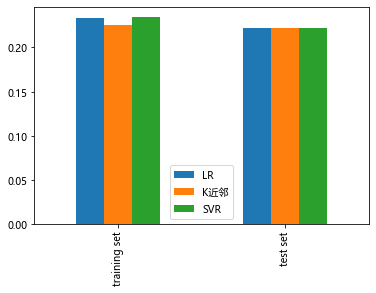

In [30]:
plt.figure(figsize=(20, 10))
model_mse.plot(kind = 'bar')

可以看到，三种回归算法的结果非常接近，相比之下，K近邻算法的效果要稍微好一些

### 4.3.2 分类算法
下面我们将数据的标签变为整型，训练一个决策树分类模型。

#### 4.3.2.1 决策树参数

DecisionTreeClassifie(criterion="gini",splitter="best",max_depth=None,min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.,
max_features=None,random_state=None,max_leaf_nodes=None)

* criterion:切分质量的评价准则。默认为'gini'(gini系数)。
* splitter:指定了在每个节点切分的策略。有两种切分策略：
        (1).splitter='best':表示选择最优的切分特征和切分点。
        (2).splitter='random':表示随机切分。
* max_depth:指定树的最大深度。如果为None，则表示树的深度不限，直到每个叶子都是纯净的。
* min_samples_split:默认为2。它指定了分裂一个内部节点(非叶子节点)需要的最小样本数。如果为浮点数(0到1之间)，最少样本分割数为ceil(min_samples_split * n_samples)
* min_samples_leaf:指定了每个叶子节点包含的最少样本数。如果为浮点数(0到1之间)，每个叶子节点包含的最少样本数为ceil(min_samples_leaf * n_samples)
* min_weight_fraction_leaf:指定了叶子节点中样本的最小权重系数。默认情况下样本有相同的权重。
* max_feature:
         (1).如果是整数，则每次节点分裂只考虑max_feature个特征。
         (2).如果是浮点数(0到1之间)，则每次分裂节点的时候只考虑int(max_features * n_features)个特征。
         (3).如果是字符串'auto',max_features=n_features。
         (4).如果是字符串'sqrt',max_features=sqrt(n_features)。
         (5).如果是字符串'log2',max_features=log2(n_features)。
         (6).如果是None，max_feature=n_feature。
* random_state:随机数生成器
* max_leaf_nodes:
         (1).如果为None，则叶子节点数量不限。
         (2).如果不为None，则max_depth被忽略。

In [31]:
y_train.value_counts

<bound method IndexOpsMixin.value_counts of 3467     4.4
10119    4.2
6284     4.1
5721     4.3
957      4.6
        ... 
9372     3.7
7291     4.3
1344     4.5
7293     3.7
1289     4.0
Name: Rating, Length: 7168, dtype: float64>

In [32]:
y_train_int = y_train.astype(int)#将数据转换为整型
y_test_int = y_test.astype(int)
print(y_train_int.unique())

[4 3 2 5 1]


可以看到，我们通过将浮点数转为整数的方式，将连续型的评分数据转换成了离散型.一共有五种类型：1，2，3，4，5，因此我们做的是一个五分类任务.

In [33]:
#初始化决策树模型
dtree=DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, random_state=42)
#训练
dtree.fit(x_train,y_train_int)
#训练集上的accuracy
dtree_pred_train = dtree.predict(x_train)
dtree_accuracy_train = dtree.score(x_train,y_train_int)
#输出测试集上的测试结果
dtree_pred_test=dtree.predict(x_test)
dtree_accuracy_test =dtree.score(x_test,y_test_int)
print("训练集accuracy：", dtree_accuracy_train)
print("测试集accuracy：", dtree_accuracy_test)

训练集accuracy： 0.7940848214285714
测试集accuracy： 0.7757161458333334


可以看到，在未调参的情况下，决策树分类模型分类的精度还可以， 训练集和测试集都在75%以上

以上就是回归和分类模型的实现方式，可以看到K近邻和决策树分类模型都取得了不错的效果。接下来我们进行模型调优。

### 4.3.3 模型调优
通过上面的对比，我们可以看出4个模型都处于欠拟合的状态。接下来我们将使用交叉验证、网格搜索和随机搜索的方式选择模型的超参数。
* 交叉验证
* 网格搜索
* 随机搜索

#### 4.3.3.1 交叉验证
以K近邻回归算法为例

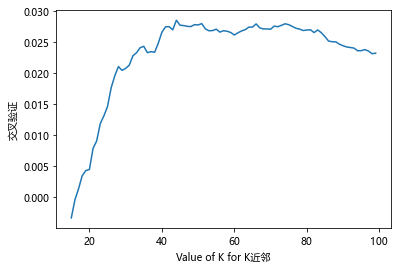

In [34]:
#建立测试参数集
k_range = range(15, 100)

k_scores = []
#由迭代的方式来计算不同参数对模型的影响，并返回交叉验证后的平均准确率
for k in k_range:
    knr = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knr, x_train, y_train,cv=10)#r2 score
    k_scores.append(scores.mean())

#可视化数据
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for K近邻')
plt.ylabel('交叉验证')
plt.show()

通过可视化的方法，我们看到K的值取40较为合适。

In [35]:
#初始化k近邻模型
k_model = KNeighborsRegressor(n_neighbors=40)
#训练
k_model.fit(x_train,y_train)
#训练集上的MSE
k_pred_train = k_model.predict(x_train)
k_mse_train = mean_squared_error(k_pred_train,y_train)
#输出测试集上的测试结果
k_pred_test=k_model.predict(x_test)
k_mse_test = mean_squared_error(k_pred_test,y_test)
print("训练集MSE：", k_mse_train)
print("测试集MSE：", k_mse_test)

训练集MSE： 0.22372010846819196
测试集MSE： 0.22145052286783853


#### 4.3.3.2 网格搜索
以决策树分类为例

In [37]:
#设置参数网格
params = [{'criterion':['gini'],'max_depth':[30,50,60,100],'min_samples_leaf':[2,3,5,10],'min_impurity_decrease':[0.1,0.2,0.5]},
         {'criterion':['gini','entropy']},
         {'max_depth': [30,60,100], 'min_impurity_decrease':[0.1,0.2,0.5]}]

best_model = GridSearchCV(dtree, param_grid=params,cv = 5,scoring ="accuracy")
best_model.fit(x_train,y_train_int)
# 输出最优的参数和分值
print('最优分类器:',best_model.best_params_,'最优分数:', best_model.best_score_) 

最优分类器: {'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2} 最优分数: 0.7813895612582862


这样通过网格搜索法，我们也确定了决策树模型的最优参数，分别为：'criterion': 'gini', 'max_depth': 30, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2

#### 4.3.3.3 随机搜索
以SVR支持向量回归模型为例

In [38]:
params_svr = {'kernel': ['rbf'], 'C': np.logspace(-3, 2, 6), 'gamma':np.arange(0,10,2)}
best_svr_model = RandomizedSearchCV(svr, param_distributions=params_svr,cv = 3,scoring ="neg_mean_squared_error")
best_svr_model.fit(features,target)
# 输出最优的参数和分值
print('最优分类器:',best_svr_model.best_params_,'最优分数:', best_svr_model.best_score_) 

最优分类器: {'kernel': 'rbf', 'gamma': 6, 'C': 0.1} 最优分数: -0.2405669885880525


这样我们通过随机搜索法也确定了支持向量回归的最优参数。

综上，我们分别使用交叉验证法、网格搜索法以及随机搜索法确定了模型的最优参数，完成了模型的调优

# 5、总结分析
本实验主要以K近邻、SVR、线性回归以及决策树分类为例回顾了有监督学习的算法，完成了APP评分的预测。相关内容主要有：

* 数据标准化的方法：归一化、标准化
- 模型：K近邻、SVR、线性回归、决策树分类
* 模型参数调优的方法：网格搜索、交叉验证、随机搜索